# Classification and Regression Tree (CART)

## Titanic Dataset
- Kaggle knowledge competition: https://www.kaggle.com/c/titanic

In [1]:
# read in the data
import pandas as pd
url = 'data/titanic.csv'
titanic = pd.read_csv(url)

# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head()

/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_25475/356517963.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Age.fillna(titanic.Age.median(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,True


In [2]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [3]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1234)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=1234)

## CART 그림 도출 - 1 (추천 방법)

- `sklearn.tree.export_graphviz`를 이용하여 **.dot** 파일을 생성
- 생성된 dot 파일을 텍스트 편집기에서 불러들인 후, 이를 복사하여 [WebGraphviz.com](http://webgraphviz.com/)에 붙여넣으면 의사결정나무 그림을 얻을 수 있음

In [4]:
# Alternatively, you can create tree images
# using dot file and WebGraphviz (http://webgraphviz.com/)
from sklearn.tree import export_graphviz

with open("titanic_tree.dot", "w") as f:
    f = export_graphviz(treeclf, 
                        out_file = f, 
                        feature_names = X.columns,
                        class_names = ["Dead", "Survived"], # 클래스가 [0,1]이므로 이 순서를 맞춰서 이름을 할당
                        filled = True,
                        rounded = True)

## CART 그림 도출 - 2

matplot library를 이용하여 그림을 그릴 수 있습니다. 다만, 옵션이 복잡하고 결과가 아름답지 않아서 추천하지 않습니다.

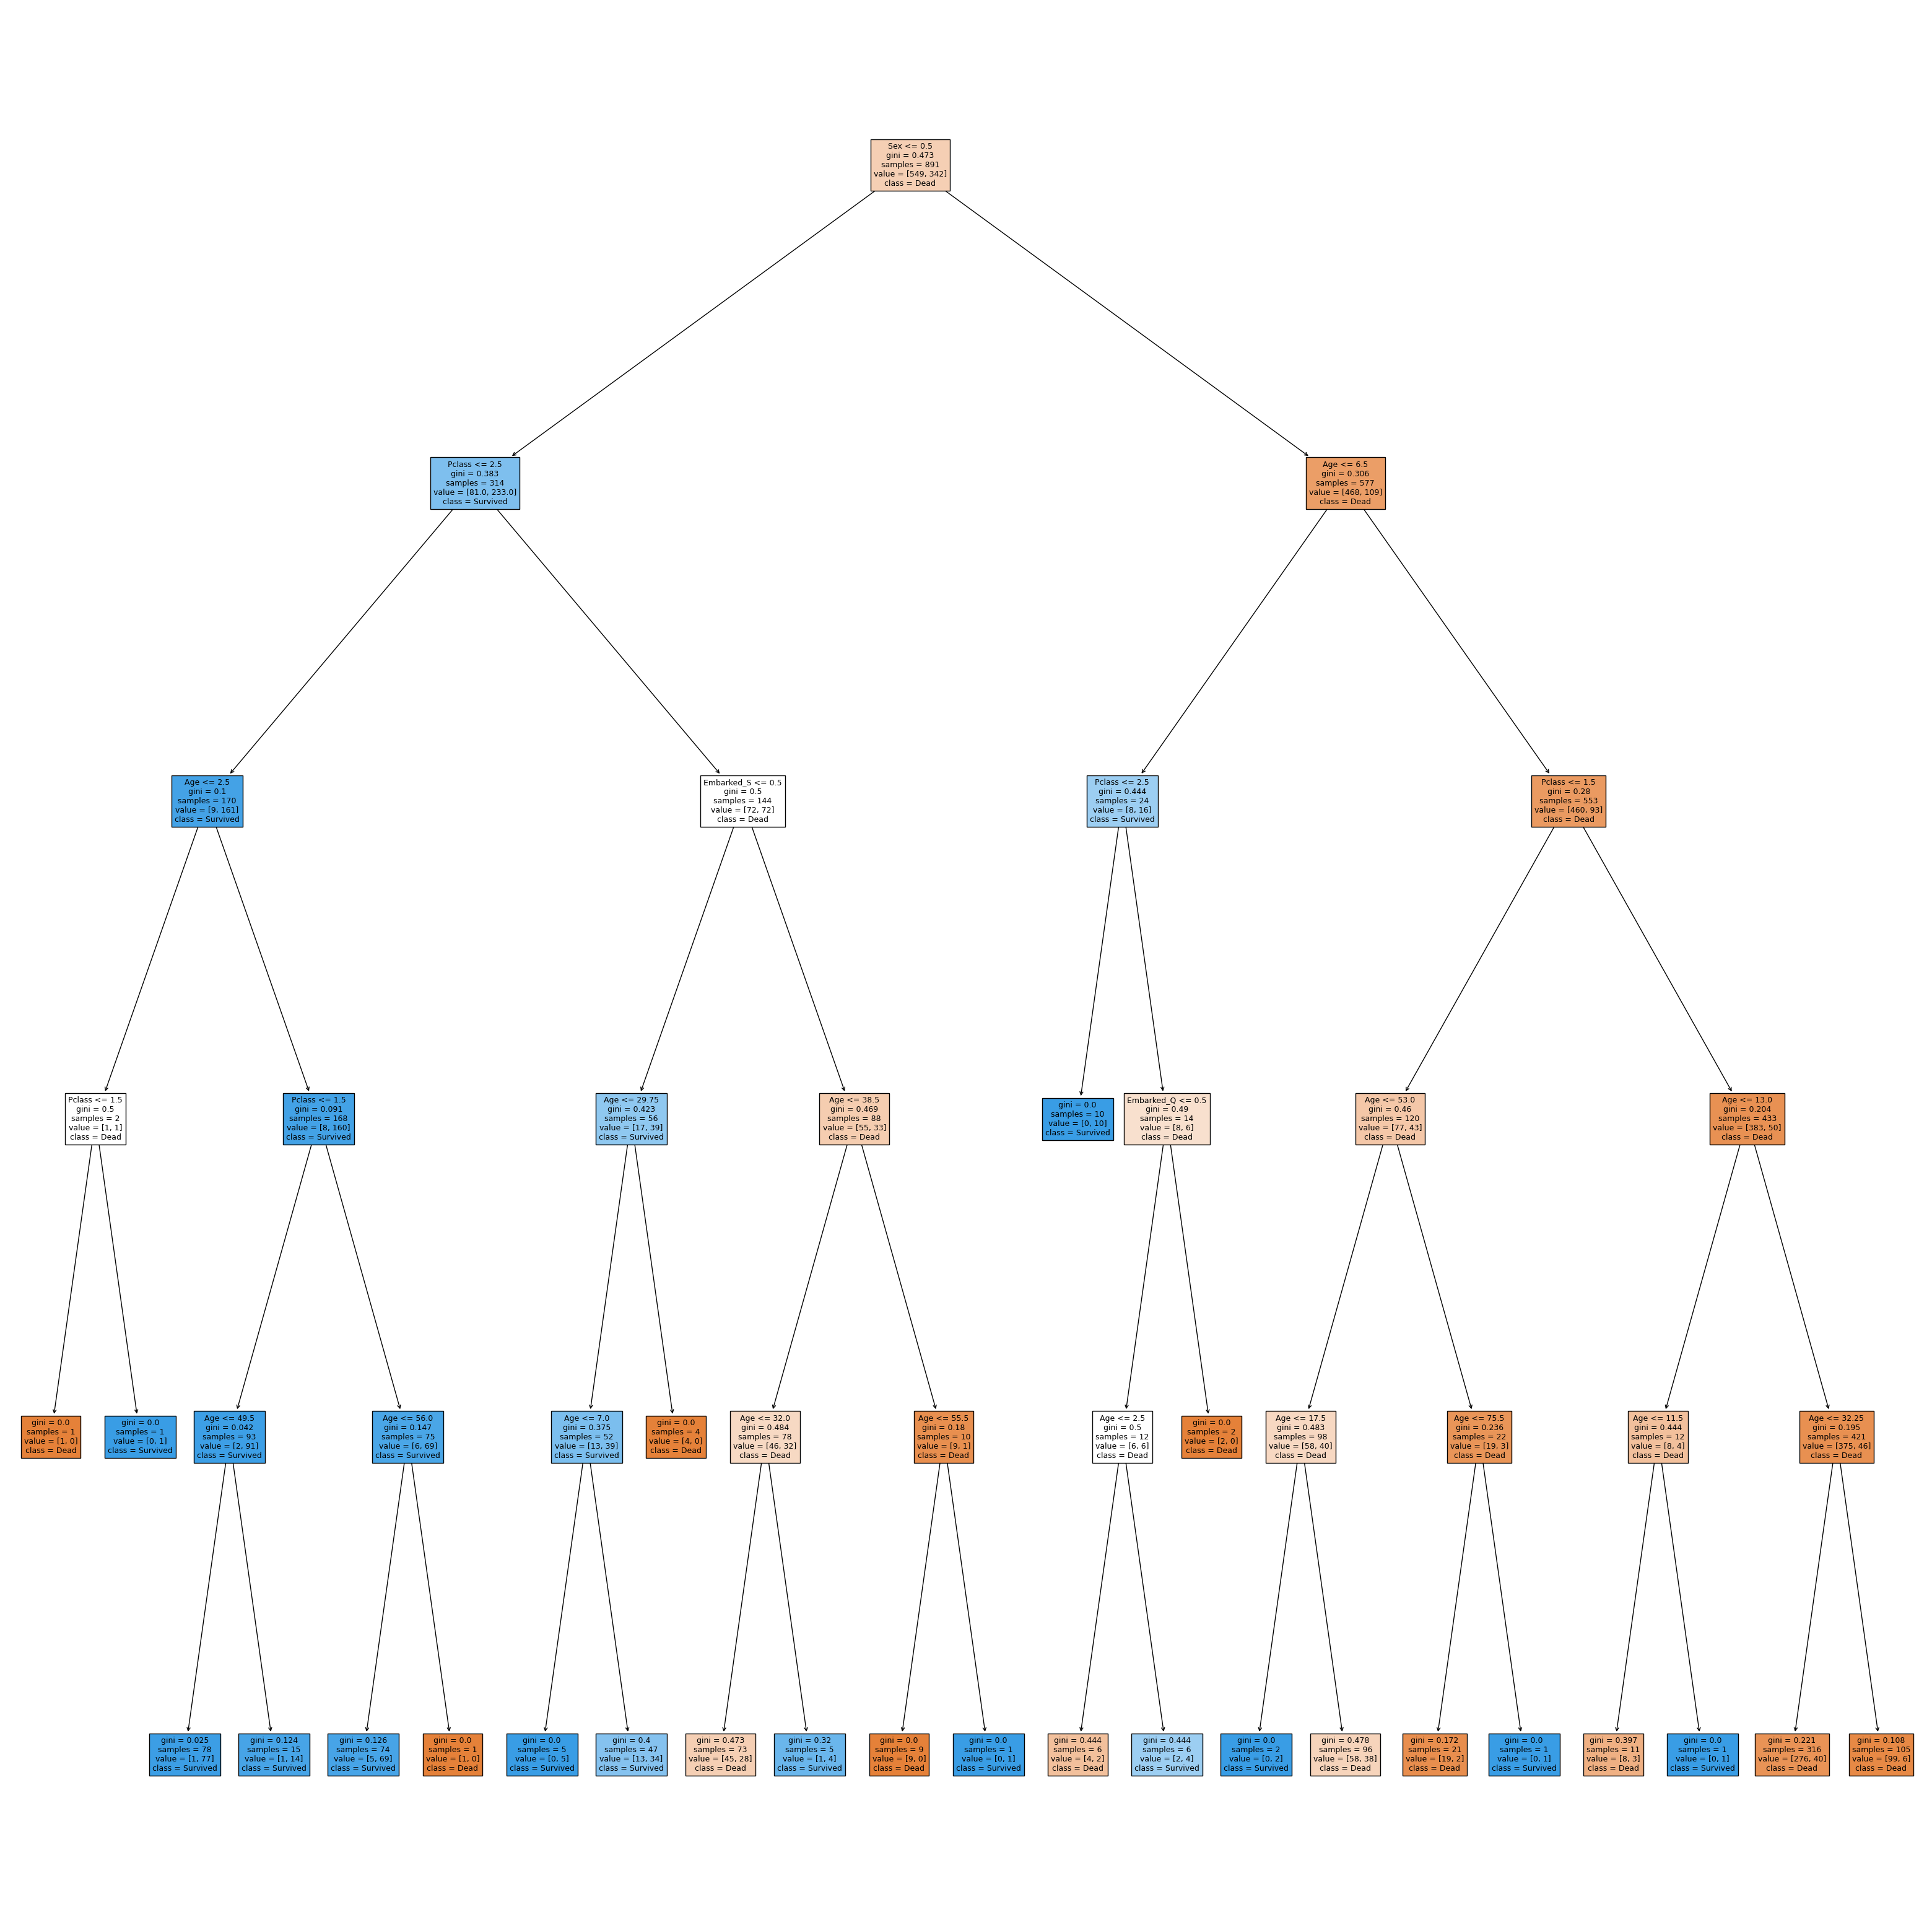

In [8]:
# Decision trees를 matplotlib으로 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 40))
plot_tree(treeclf, filled=True, feature_names=feature_cols, class_names=["Dead", "Survived"])
plt.show()


## [Task]
1. Decision Tree의 여러 가지 하이퍼파라미터를 수정하면서 모델의 변화를 살펴봅시다.